# CSCI 3360 Group 1 Final Project Code
Group members: Rebekah McLatcher, Abi Clark, Eunice Stephen, Rajeshwari Raja, Abigail Boone.  

Running the notebook: in this notebook you will find all of the code for our final project. It has been organized into sections A - H with summary statistics at the beginning, followed by our 5 models. Install and import statements are includes throughout the sections as they are needed; therefore, the notebook should run without error if each cell is run in succession in the order that it is presented here.


# A. Importing the Data

In [21]:
import pandas as pd
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# B. Summary Statistics

In [22]:
# picking variable to analyze
columns_to_analyze = ['age', 'avg_glucose_level', 'bmi']

age_stats = stroke_data.groupby('stroke')['age'].agg(['mean', 'median', 'std', 'min', 'max'])
glucose_stats = stroke_data.groupby('stroke')['avg_glucose_level'].agg(['mean', 'median', 'std', 'min', 'max'])
bmi_stats = stroke_data.groupby('stroke')['bmi'].agg(['mean', 'median', 'std', 'min', 'max'])

print("Age Statistics by Stroke Group:")
print(age_stats)
print("\nAverage Glucose Level Statistics by Stroke Group:")
print(glucose_stats)
print("\nBMI Statistics by Stroke Group:")
print(bmi_stats)

Age Statistics by Stroke Group:
             mean  median        std   min   max
stroke                                          
0       41.971545    43.0  22.291940  0.08  82.0
1       67.728193    71.0  12.727419  1.32  82.0

Average Glucose Level Statistics by Stroke Group:
              mean  median        std    min     max
stroke                                              
0       104.795513   91.47  43.846069  55.12  267.76
1       132.544739  105.22  61.921056  56.11  271.74

BMI Statistics by Stroke Group:
             mean  median       std   min   max
stroke                                         
0       28.823064    28.0  7.908287  10.3  97.6
1       30.471292    29.7  6.329452  16.9  56.6


Based on the statistics above, there seems to be a correlation between age and stroke as well as average glucose level and stroke. This suggests that older people are more likely to have a stroke than younger people. Also, people with higher glucose levels are more likely to have a stroke than people with lower glucose levels.  The BMI between groups is roughly the same, so there is no clear indication if there is a correlation between BMI and stroke.

## Scatterplot figures

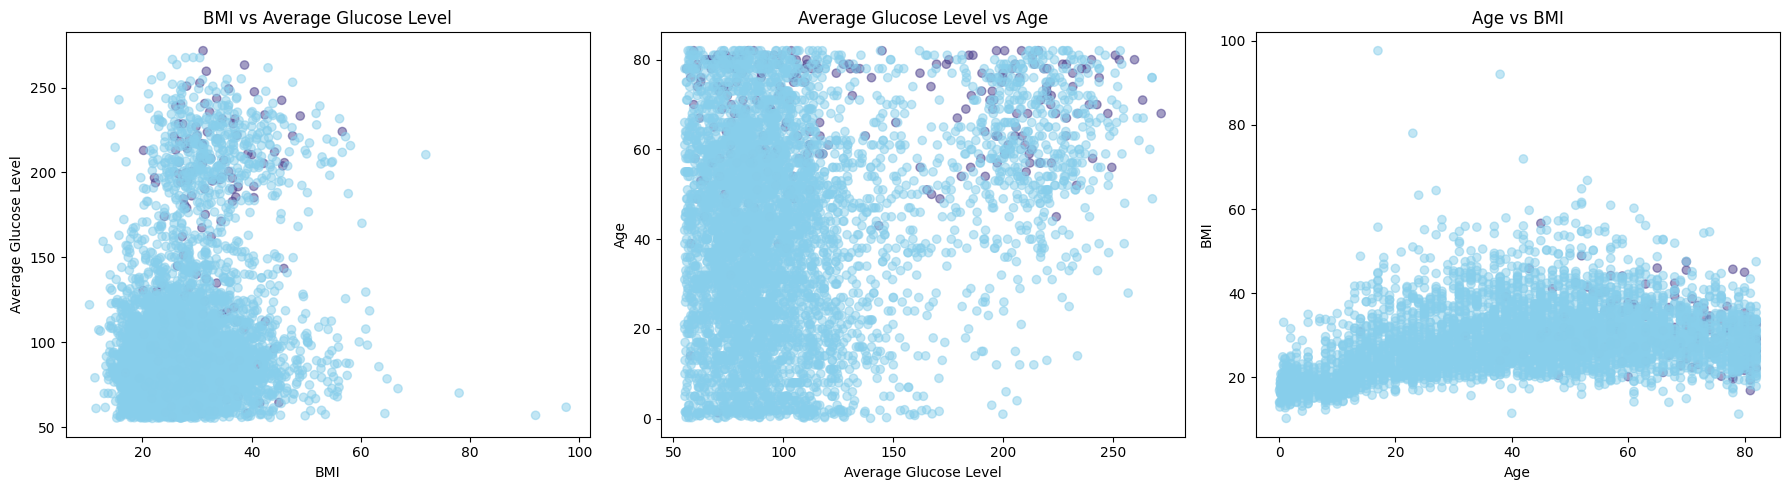

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# stroke status
colors = data['stroke'].map({0: 'skyblue', 1: 'darkslateblue'})

plt.figure(figsize=(18, 5))

# scatter plot for BMI vs Average Glucose Level
plt.subplot(1, 3, 1)
plt.scatter(data['bmi'], data['avg_glucose_level'], c=colors, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('BMI vs Average Glucose Level')

# scatter plot for Average Glucose Level vs Age
plt.subplot(1, 3, 2)
plt.scatter(data['avg_glucose_level'], data['age'], c=colors, alpha=0.5)
plt.xlabel('Average Glucose Level')
plt.ylabel('Age')
plt.title('Average Glucose Level vs Age')

# scatter plot for Age vs BMI
plt.subplot(1, 3, 3)
plt.scatter(data['age'], data['bmi'], c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')

plt.tight_layout()
plt.show()

# C. Naive Bayes Models

## Bar-graph figure

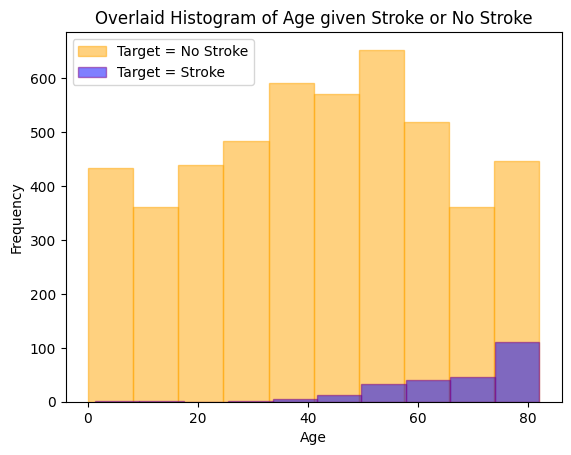

In [24]:
# Subset the data
age_noStroke = stroke_data[stroke_data['stroke'] ==0]
age_stroke = stroke_data[stroke_data['stroke']==1]
plt.hist(age_noStroke['age'], alpha=0.5, label='Target = No Stroke', color='orange', edgecolor = 'orange')
plt.hist(age_stroke['age'],  alpha=0.5, label='Target = Stroke', color='blue', edgecolor ='purple')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Overlaid Histogram of Age given Stroke or No Stroke')
plt.legend()

# Show plot
plt.show()

Analysis: The distribution of age for those who did not have stroke is approximately normal, but the age of those who had a stroke is skewed left. The median age of stroke is approximately 75. This graph also reveals the imbalance in class distribution. There are many more instances of no stroke than there are instances of having a stroke. 

## Preprocessing the data

In [25]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We need to transform gender, ever-married, work-type, residence-type, and smoking-status into float to work with the Naive Bayes model.

### Encoding the object features

In [26]:
from sklearn.preprocessing import OneHotEncoder

## encoding the gender variable
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

## encoder

encoder_married = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_gender = OneHotEncoder(sparse_output = False, handle_unknown ='ignore')
encoder_work = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder_residence = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder_smoking = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

## encoder per feature

gender_encoded = encoder_gender.fit_transform(stroke_data[['gender']])
married_encoded = encoder_married.fit_transform(stroke_data[['ever_married']])
work_encoded = encoder_work.fit_transform(stroke_data[['work_type']])
residence_encoded = encoder_residence.fit_transform(stroke_data[['Residence_type']])
smoking_encoded = encoder_smoking.fit_transform(stroke_data[['smoking_status']])

## dataframe per feature

gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder_gender.get_feature_names_out(['gender']))
married_encoded_df = pd.DataFrame(married_encoded, columns=encoder_married.get_feature_names_out(['ever_married']))
work_encoded_df = pd.DataFrame(work_encoded, columns=encoder_work.get_feature_names_out(['work_type']))
residence_encoded_df = pd.DataFrame(residence_encoded, columns=encoder_residence.get_feature_names_out(['Residence_type']))
smoking_encoded = encoder_smoking.fit_transform(stroke_data[['smoking_status']])
stroke_data = pd.concat([stroke_data, gender_encoded_df,married_encoded_df, work_encoded_df], axis=1).drop(columns=['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type'])

In [27]:
# Dropping the rows with na values
stroke_data = stroke_data.dropna()

## Splitting the data into testing and training and validation

In [28]:
from sklearn.model_selection import train_test_split
#stroke_data = stroke_data.drop('id', axis = 1)

X = stroke_data.drop('stroke', axis = 1)
y = stroke_data['stroke']

# splitting into testing and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting testing into testing and validation

X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42) 


print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 3927
Validation set size: 1963
Testing set size: 1964


## Naive Bayes Model 1: Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

In [30]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [31]:
y_train_predicted = model.predict(X_train)

### training predictions

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3771
           1       0.19      0.28      0.23       156

    accuracy                           0.92      3927
   macro avg       0.58      0.62      0.59      3927
weighted avg       0.94      0.92      0.93      3927



### validation predictions

In [33]:
y_val_pred = model.predict(X_val)

In [34]:
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1891
           1       0.17      0.28      0.21        72

    accuracy                           0.93      1963
   macro avg       0.57      0.61      0.59      1963
weighted avg       0.94      0.93      0.93      1963



## Naive Bayes Model 2: Bernoulli Naive Bayes

In [35]:
bern_model = BernoulliNB() # trying a different distribution based on model 

In [36]:
bern_model.fit(X_train, y_train)

BernoulliNB()

In [37]:
y_train_predicted_bern = bern_model.predict(X_train)

In [38]:
print(metrics.classification_report(y_train, y_train_predicted_bern)) 
# still yeilds poor precision and recall for f1-score

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3771
           1       0.17      0.04      0.07       156

    accuracy                           0.95      3927
   macro avg       0.57      0.52      0.52      3927
weighted avg       0.93      0.95      0.94      3927



### tunining the prior parameter in attempt to improve prediction power

In [39]:
## Hypertuning the prior parameter to try to improve the predictions
model2 = GaussianNB(priors = [0.9, 0.1]) # fitting the model with the priors 
model2.fit(X_train, y_train)

GaussianNB(priors=[0.9, 0.1])

In [40]:
y_train_predicted2 = model2.predict(X_train)

In [41]:
print(metrics.classification_report(y_train, y_train_predicted2)) 
# f1- score did not improve with the priors

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3771
           1       0.17      0.37      0.23       156

    accuracy                           0.90      3927
   macro avg       0.57      0.65      0.59      3927
weighted avg       0.94      0.90      0.92      3927



## Preparing to use RandomUnderSampler

In [42]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.under_sampling import RandomUnderSampler

stroke_data['stroke'].value_counts(normalize=True) 
# Data is very imbalanced, could impact the ability of the model to learn the stroke predicitions

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64

### Using RandomSampler to balance the non stroke (y=0) and stroke (y=1)

In [44]:
randsamp = RandomUnderSampler(sampling_strategy = 1, random_state=32)
## resampling training set for imbalanced data
X_train_rus, y_train_rus = randsamp.fit_resample(X_train, y_train)

print(f"Training set size: {len(X_train_rus)}\n")

print("Imbalanced training set value counts: ")
print(y_train.value_counts())
print()

print("Balanced training set value counts:")
print(y_train_rus.value_counts())

Training set size: 312

Imbalanced training set value counts: 
stroke
0    3771
1     156
Name: count, dtype: int64

Balanced training set value counts:
stroke
0    156
1    156
Name: count, dtype: int64


### Gaussian Model with random sampling

In [45]:
rus_model = GaussianNB()
rus_model.fit(X_train_rus, y_train_rus)

GaussianNB()

In [46]:
y_train_pred_rus = rus_model.predict(X_train_rus)

In [47]:
print(metrics.classification_report(y_train_rus, y_train_pred_rus)) 
# overall good f1-score, but lost some predicting power since we reduced our training size

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       156
           1       0.72      0.83      0.77       156

    accuracy                           0.76       312
   macro avg       0.76      0.76      0.75       312
weighted avg       0.76      0.76      0.75       312



In [48]:
y_val_pred = rus_model.predict(X_val)

In [49]:
print(metrics.classification_report(y_val, y_val_pred)) 
# did not generalize well to the new data

              precision    recall  f1-score   support

           0       0.99      0.66      0.80      1891
           1       0.09      0.86      0.16        72

    accuracy                           0.67      1963
   macro avg       0.54      0.76      0.48      1963
weighted avg       0.96      0.67      0.77      1963



## Trying Smote over sampling to address low precision

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [51]:
smote_model = GaussianNB()
smote_model.fit(X_train_smote, y_train_smote)

GaussianNB()

In [52]:
y_train_smote = smote_model.predict(X_train_smote) 
print(metrics.classification_report(y_train_smote, y_train_smote)) # may be overfit

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2726
           1       1.00      1.00      1.00      4816

    accuracy                           1.00      7542
   macro avg       1.00      1.00      1.00      7542
weighted avg       1.00      1.00      1.00      7542



In [53]:
y_val_pred_smote = smote_model.predict(X_val)
print(metrics.classification_report(y_val, y_val_pred_smote))  # high recall, but very poor precision for stroke predictions

              precision    recall  f1-score   support

           0       0.99      0.64      0.78      1891
           1       0.08      0.88      0.15        72

    accuracy                           0.65      1963
   macro avg       0.54      0.76      0.47      1963
weighted avg       0.96      0.65      0.75      1963



Low precision indicates that of all the instances that the model predicted to be positive, only a low percentage were actually positive. Inversely, the recall is high meaning that the model did correctly identify most of the positive instances.

In [54]:
## Adjusting the Decision threshold

y_probs = smote_model.predict_proba(X_val)[:, 1]
threshold = 0.9

y_pred = (y_probs >= threshold).astype(int)

print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1891
           1       0.12      0.33      0.17        72

    accuracy                           0.88      1963
   macro avg       0.54      0.62      0.55      1963
weighted avg       0.94      0.88      0.91      1963



Adjusting the decision threshold (above) slightly increased the f1-score. 

## Random oversampling

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [56]:
model_ros = GaussianNB()
model_ros.fit(X_train_ros, y_train_ros)

# Evaluate on validation data
y_val_pred_ros = model_ros.predict(X_val)
print("Classification Report:")
print(metrics.classification_report(y_val, y_val_pred_ros))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.66      0.80      1891
           1       0.09      0.86      0.16        72

    accuracy                           0.67      1963
   macro avg       0.54      0.76      0.48      1963
weighted avg       0.96      0.67      0.77      1963



Adjusting the decision threshold for the random over sampled data

In [57]:
y_probs_ros = model_ros.predict_proba(X_val)[:, 1]
threshold = 0.9

y_pred_ros = (y_probs_ros >= threshold).astype(int)

print(metrics.classification_report(y_val, y_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1891
           1       0.14      0.31      0.19        72

    accuracy                           0.90      1963
   macro avg       0.55      0.62      0.57      1963
weighted avg       0.94      0.90      0.92      1963



In [58]:
y_probs_ros = model_ros.predict_proba(X_test)[:, 1]
threshold = 0.9

y_pred_ros = (y_probs_ros >= threshold).astype(int)

print(metrics.classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1880
           1       0.20      0.43      0.27        84

    accuracy                           0.90      1964
   macro avg       0.59      0.68      0.61      1964
weighted avg       0.94      0.90      0.92      1964



In [59]:
# Decsion threshold for the gaussian model 
y_prob_guas = model.predict_proba(X_val)[:, 1]
threshold = 0.9

y_pred_gaus = (y_prob_guas>= threshold).astype(int)

print(metrics.classification_report(y_val, y_pred_gaus))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1891
           1       0.08      0.01      0.02        72

    accuracy                           0.96      1963
   macro avg       0.52      0.50      0.50      1963
weighted avg       0.93      0.96      0.94      1963



It appears that in terms of weighted average, f1-score and precision to recall balance, the random oversampled model with adjusted decision threshold of 0.9 is the most suitable model 

# D. Random Forest Model

In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
# imports and re-downloading the data
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

all_data = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='utf-8-sig')
all_data.set_index('id');

### One-Hot Encoding

In [62]:
all_data = pd.get_dummies(all_data, columns=['gender', 
                                   'ever_married', 
                                   'work_type', 
                                   'Residence_type', 
                                   'smoking_status'], 
                       drop_first=True)

### Split data into training, validation, and testing

In [63]:
X_all = all_data.drop(columns = 'stroke')
y_all = all_data['stroke']

# random state 42
X_train, X_test, y_train, y_test = train_test_split(
  X_all, y_all, random_state = 42, test_size = 0.20, shuffle = True)

X_val, X_test, y_val, y_test = train_test_split(
  X_test, y_test, random_state = 42, test_size = 0.50, shuffle = True)

### Random Forest with n_estimators = 100

In [64]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

X_train = X_train.drop(columns = ['id'])
X_val = X_val.drop(columns = ['id'])
X_test = X_test.drop(columns = ['id'])

random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion = "entropy",
                                       random_state = 3,
                                       min_samples_split = 2)  # random state makes it reproducible

random_forest.fit(X_train, y_train)

y_train_predicted = random_forest.predict(X_train)

y_val_predicted = random_forest.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00       187

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088

Validation Set
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       1.00      0.03      0.06        31

    accuracy                           0.94       511
   macro avg       0.97      0.52      0.52       511
weighted avg       0.94      0.94      0.91       511

(array([ 13,  23,  29,  38,  55,  71, 104, 112, 123, 146, 173, 189, 194,
       199, 208, 223, 257, 259, 299, 308, 312, 314, 345, 361, 378, 380,
       394, 456, 472, 480, 483]),)
(array([23]),)


### Random Under-Sampling

In [65]:
randsamp = RandomUnderSampler(random_state=32)
X_train_rus, y_train_rus = randsamp.fit_resample(X_train, y_train)
X_val_rus, y_val_rus = randsamp.fit_resample(X_val, y_val)

print(y_train.value_counts())
print(y_train_rus.value_counts())

stroke
0    3901
1     187
Name: count, dtype: int64
stroke
0    187
1    187
Name: count, dtype: int64


In [66]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "entropy",
                                       random_state = 3,
                                       min_samples_split = 2)  # random state makes it reproducible

random_forest.fit(X_train_rus, y_train_rus)

y_train_predicted = random_forest.predict(X_train_rus)

y_val_predicted = random_forest.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       187

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

Validation Set
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       480
           1       0.15      0.71      0.25        31

    accuracy                           0.74       511
   macro avg       0.56      0.73      0.55       511
weighted avg       0.93      0.74      0.81       511

(array([ 13,  23,  29,  38,  55,  71, 104, 112, 123, 146, 173, 189, 194,
       199, 208, 223, 257, 259, 299, 308, 312, 314, 345, 361, 378, 380,
       394, 456, 472, 480, 483]),)
(array([  1,   3,   5,   9,  12,  17,  23,  24,  26,  27,  29,  30,  38,
        43,  44,  48,  52,  53,  54,  55,  58,  62,  63,  64,  69

### Tuning n_estimators and max_depth

In [67]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 5,
                                       max_depth = 7,
                                       criterion = "entropy",
                                       random_state = 3,
                                       min_samples_split = 2)  # random state makes it reproducible

random_forest.fit(X_train_rus, y_train_rus)

y_train_predicted = random_forest.predict(X_train_rus)

y_val_predicted = random_forest.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       187
           1       0.84      0.89      0.87       187

    accuracy                           0.86       374
   macro avg       0.86      0.86      0.86       374
weighted avg       0.86      0.86      0.86       374

Validation Set
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       480
           1       0.15      0.90      0.26        31

    accuracy                           0.69       511
   macro avg       0.57      0.79      0.54       511
weighted avg       0.94      0.69      0.77       511

(array([ 13,  23,  29,  38,  55,  71, 104, 112, 123, 146, 173, 189, 194,
       199, 208, 223, 257, 259, 299, 308, 312, 314, 345, 361, 378, 380,
       394, 456, 472, 480, 483]),)
(array([  1,   3,   5,   6,   9,  11,  12,  16,  17,  18,  19,  22,  23,
        26,  27,  29,  30,  36,  38,  44,  45,  48,  52,  53,  54

In [68]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 5,
                                       max_depth = 3,
                                       criterion = "entropy",
                                       random_state = 3,
                                       min_samples_split = 2)  # random state makes it reproducible

random_forest.fit(X_train_rus, y_train_rus)

y_train_predicted = random_forest.predict(X_train_rus)

y_val_predicted = random_forest.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       187
           1       0.79      0.62      0.69       187

    accuracy                           0.73       374
   macro avg       0.74      0.73      0.72       374
weighted avg       0.74      0.73      0.72       374

Validation Set
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       480
           1       0.19      0.77      0.30        31

    accuracy                           0.78       511
   macro avg       0.58      0.78      0.59       511
weighted avg       0.93      0.78      0.84       511

(array([ 13,  23,  29,  38,  55,  71, 104, 112, 123, 146, 173, 189, 194,
       199, 208, 223, 257, 259, 299, 308, 312, 314, 345, 361, 378, 380,
       394, 456, 472, 480, 483]),)
(array([  1,  12,  16,  17,  19,  22,  23,  24,  27,  29,  30,  38,  43,
        44,  45,  48,  55,  58,  62,  63,  64,  76,  77,  80,  84

## Testing

In [69]:
X_train = X_train_rus

In [70]:
random_forest_selected = RandomForestClassifier(n_estimators = 5, 
                                       max_depth = 3,
                                       criterion = "entropy",
                                       random_state = 3,
                                       min_samples_split = 2)  # random state makes it reproducible

random_forest_selected.fit(X_train_rus, y_train_rus)

y_train_predicted = random_forest_selected.predict(X_train_rus)

y_test_predicted = random_forest_selected.predict(X_test)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Testing Set')
print(metrics.classification_report(y_test, y_test_predicted));


Training Set
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       187
           1       0.79      0.62      0.69       187

    accuracy                           0.73       374
   macro avg       0.74      0.73      0.72       374
weighted avg       0.74      0.73      0.72       374

Testing Set
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       480
           1       0.20      0.77      0.31        31

    accuracy                           0.79       511
   macro avg       0.59      0.79      0.60       511
weighted avg       0.93      0.79      0.84       511



# E. SVM Model

In [71]:
# imports and re-downloading the data
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

all_data = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='utf-8-sig')
all_data.set_index('id');

### One-Hot Encoding

In [72]:
all_data = pd.get_dummies(all_data, columns=['gender', 
                                   'ever_married', 
                                   'work_type', 
                                   'Residence_type', 
                                   'smoking_status'], 
                       drop_first=True)
all_data = all_data.dropna()    

### Split Data into training, testing, and validation

In [73]:
X_all = all_data.drop(columns = 'stroke')
y_all = all_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(
  X_all, y_all, random_state = 42, test_size = 0.20, shuffle = True)

X_val, X_test, y_val, y_test = train_test_split(
  X_test, y_test, random_state = 42, test_size = 0.50, shuffle = True)

X_train = X_train.drop(columns = ['id', 'gender_Other'])
X_val = X_val.drop(columns = ['id', 'gender_Other'])
X_test = X_test.drop(columns = ['id', 'gender_Other'])

### Normalization

In [74]:
# normalization
for col in X_train.columns:
    X_train[col] = (X_train[col] - X_train[col].mean()) / X_train[col].std()

for col in X_val.columns:
    X_val[col] = (X_val[col] - X_val[col].mean()) / X_val[col].std()

for col in X_test.columns:
    X_test[col] = (X_test[col] - X_test[col].mean()) / X_test[col].std()

### Support Vector Machine with C=1

In [75]:
from sklearn import metrics
from sklearn.svm import SVC

svm = SVC(C = 1, kernel = 'rbf')

svm.fit(X_train, y_train)

y_train_predicted = svm.predict(X_train)

y_val_predicted = svm.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3771
           1       1.00      0.01      0.03       156

    accuracy                           0.96      3927
   macro avg       0.98      0.51      0.50      3927
weighted avg       0.96      0.96      0.94      3927

Validation Set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       468
           1       0.00      0.00      0.00        23

    accuracy                           0.95       491
   macro avg       0.48      0.50      0.49       491
weighted avg       0.91      0.95      0.93       491

(array([ 15,  17,  33,  36,  53,  76, 141, 176, 203, 217, 224, 231, 303,
       307, 309, 338, 340, 358, 361, 391, 409, 431, 448]),)
(array([], dtype=int64),)


/Users/AbigailClark1/Documents/UGA !/fall 2024/CSCI 3360/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/AbigailClark1/Documents/UGA !/fall 2024/CSCI 3360/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/AbigailClark1/Documents/UGA !/fall 2024/CSCI 3360/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

### Random Under-Sampling

In [76]:
randsamp = RandomUnderSampler(random_state=32)
X_train_rus, y_train_rus = randsamp.fit_resample(X_train, y_train)
X_val_rus, y_val_rus = randsamp.fit_resample(X_val, y_val)

print(y_train.value_counts())
print(y_train_rus.value_counts())

stroke
0    3771
1     156
Name: count, dtype: int64
stroke
0    156
1    156
Name: count, dtype: int64


In [77]:
svm_selected = SVC(C = 1, kernel = 'rbf')

svm_selected.fit(X_train_rus, y_train_rus)

y_train_predicted = svm_selected.predict(X_train_rus)

y_val_predicted = svm_selected.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       156
           1       0.78      0.81      0.80       156

    accuracy                           0.79       312
   macro avg       0.79      0.79      0.79       312
weighted avg       0.79      0.79      0.79       312

Validation Set
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       468
           1       0.12      0.70      0.20        23

    accuracy                           0.74       491
   macro avg       0.55      0.72      0.52       491
weighted avg       0.94      0.74      0.81       491

(array([ 15,  17,  33,  36,  53,  76, 141, 176, 203, 217, 224, 231, 303,
       307, 309, 338, 340, 358, 361, 391, 409, 431, 448]),)
(array([  1,   2,   5,   9,  12,  17,  20,  25,  27,  29,  33,  36,  44,
        46,  49,  50,  53,  56,  59,  60,  61,  66,  68,  70,  72,  76,
        77,  81,  86,  88, 104, 106, 114

### Tuning C

In [78]:
svm_selected = SVC(C = 3, kernel = 'rbf')

svm_selected.fit(X_train_rus, y_train_rus)

y_train_predicted = svm_selected.predict(X_train_rus)

y_val_predicted = svm_selected.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       156
           1       0.87      0.83      0.85       156

    accuracy                           0.86       312
   macro avg       0.86      0.86      0.86       312
weighted avg       0.86      0.86      0.86       312

Validation Set
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       468
           1       0.10      0.61      0.17        23

    accuracy                           0.73       491
   macro avg       0.54      0.67      0.51       491
weighted avg       0.93      0.73      0.81       491

(array([ 15,  17,  33,  36,  53,  76, 141, 176, 203, 217, 224, 231, 303,
       307, 309, 338, 340, 358, 361, 391, 409, 431, 448]),)
(array([  1,   2,   5,   9,  12,  17,  20,  25,  27,  29,  33,  36,  44,
        46,  49,  50,  53,  56,  59,  60,  61,  66,  68,  70,  72,  76,
        77,  81,  86,  88,  96,  98, 104

In [79]:
svm_selected = SVC(C = 0.5, kernel = 'rbf')

svm_selected.fit(X_train_rus, y_train_rus)

y_train_predicted = svm_selected.predict(X_train_rus)

y_val_predicted = svm_selected.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       156
           1       0.76      0.81      0.78       156

    accuracy                           0.78       312
   macro avg       0.78      0.78      0.78       312
weighted avg       0.78      0.78      0.78       312

Validation Set
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       468
           1       0.12      0.74      0.21        23

    accuracy                           0.74       491
   macro avg       0.55      0.74      0.52       491
weighted avg       0.94      0.74      0.81       491

(array([ 15,  17,  33,  36,  53,  76, 141, 176, 203, 217, 224, 231, 303,
       307, 309, 338, 340, 358, 361, 391, 409, 431, 448]),)
(array([  1,   2,   5,   9,  12,  17,  20,  25,  27,  33,  36,  44,  46,
        49,  50,  53,  56,  59,  60,  61,  66,  68,  70,  72,  76,  77,
        81,  86,  88, 104, 105, 106, 119

In [80]:
svm_selected = SVC(C = 1, kernel = 'rbf', gamma = 0.01)

svm_selected.fit(X_train_rus, y_train_rus)

y_train_predicted = svm_selected.predict(X_train_rus)

y_val_predicted = svm_selected.predict(X_val)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted));

print(np.where(y_val == 1))
print(np.where(y_val_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       156
           1       0.75      0.80      0.77       156

    accuracy                           0.77       312
   macro avg       0.77      0.77      0.77       312
weighted avg       0.77      0.77      0.77       312

Validation Set
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       468
           1       0.12      0.74      0.21        23

    accuracy                           0.74       491
   macro avg       0.55      0.74      0.53       491
weighted avg       0.94      0.74      0.81       491

(array([ 15,  17,  33,  36,  53,  76, 141, 176, 203, 217, 224, 231, 303,
       307, 309, 338, 340, 358, 361, 391, 409, 431, 448]),)
(array([  1,   2,   5,   9,  12,  16,  17,  20,  25,  27,  33,  36,  44,
        46,  49,  50,  53,  56,  60,  61,  66,  68,  70,  72,  76,  77,
        81,  84,  86,  88, 104, 106, 114

In [81]:
svm_selected = SVC(C = 1, kernel = 'rbf')

svm_selected.fit(X_train_rus, y_train_rus)

y_train_predicted = svm_selected.predict(X_train_rus)

y_test_predicted = svm_selected.predict(X_test)

# metrics for validation
print('Training Set')
print(metrics.classification_report(y_train_rus, y_train_predicted));
print('Testing Set')
print(metrics.classification_report(y_test, y_test_predicted));

print(np.where(y_test == 1))
print(np.where(y_test_predicted == 1))

Training Set
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       156
           1       0.78      0.81      0.80       156

    accuracy                           0.79       312
   macro avg       0.79      0.79      0.79       312
weighted avg       0.79      0.79      0.79       312

Testing Set
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       461
           1       0.17      0.90      0.28        30

    accuracy                           0.72       491
   macro avg       0.58      0.81      0.56       491
weighted avg       0.94      0.72      0.80       491

(array([  0,   7,  26,  28,  34,  83,  91, 148, 153, 169, 181, 207, 267,
       294, 316, 322, 334, 335, 360, 363, 372, 393, 404, 426, 432, 442,
       454, 462, 468, 474]),)
(array([  0,   4,   7,  11,  13,  14,  15,  17,  20,  21,  23,  28,  34,
        35,  38,  44,  48,  49,  52,  56,  57,  61,  65,  69,  71,  76,
 

# F. Decision Trees Model

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# re-import the dataset 
all_data = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='utf-8-sig')
all_data.set_index('id');

In [83]:
all_data = pd.get_dummies(all_data, columns=['gender', 
                                   'ever_married', 
                                   'work_type', 
                                   'Residence_type', 
                                   'smoking_status'], 
                       drop_first=True)
all_data = all_data.dropna()    

In [84]:
X_all = all_data.drop(columns = 'stroke')
y_all = all_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(
  X_all, y_all, random_state = 42, test_size = 0.20, shuffle = True)

X_val, X_test, y_val, y_test = train_test_split(
  X_test, y_test, random_state = 42, test_size = 0.50, shuffle = True)

X_train = X_train.drop(columns = ['id', 'gender_Other'])
X_val = X_val.drop(columns = ['id', 'gender_Other'])
X_test = X_test.drop(columns = ['id', 'gender_Other'])

Class distribution:
 stroke
0    4700
1     209
Name: count, dtype: int64

Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00       156

    accuracy                           1.00      3927
   macro avg       1.00      1.00      1.00      3927
weighted avg       1.00      1.00      1.00      3927


Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       468
           1       0.18      0.13      0.15        23

    accuracy                           0.93       491
   macro avg       0.57      0.55      0.56       491
weighted avg       0.92      0.93      0.93       491



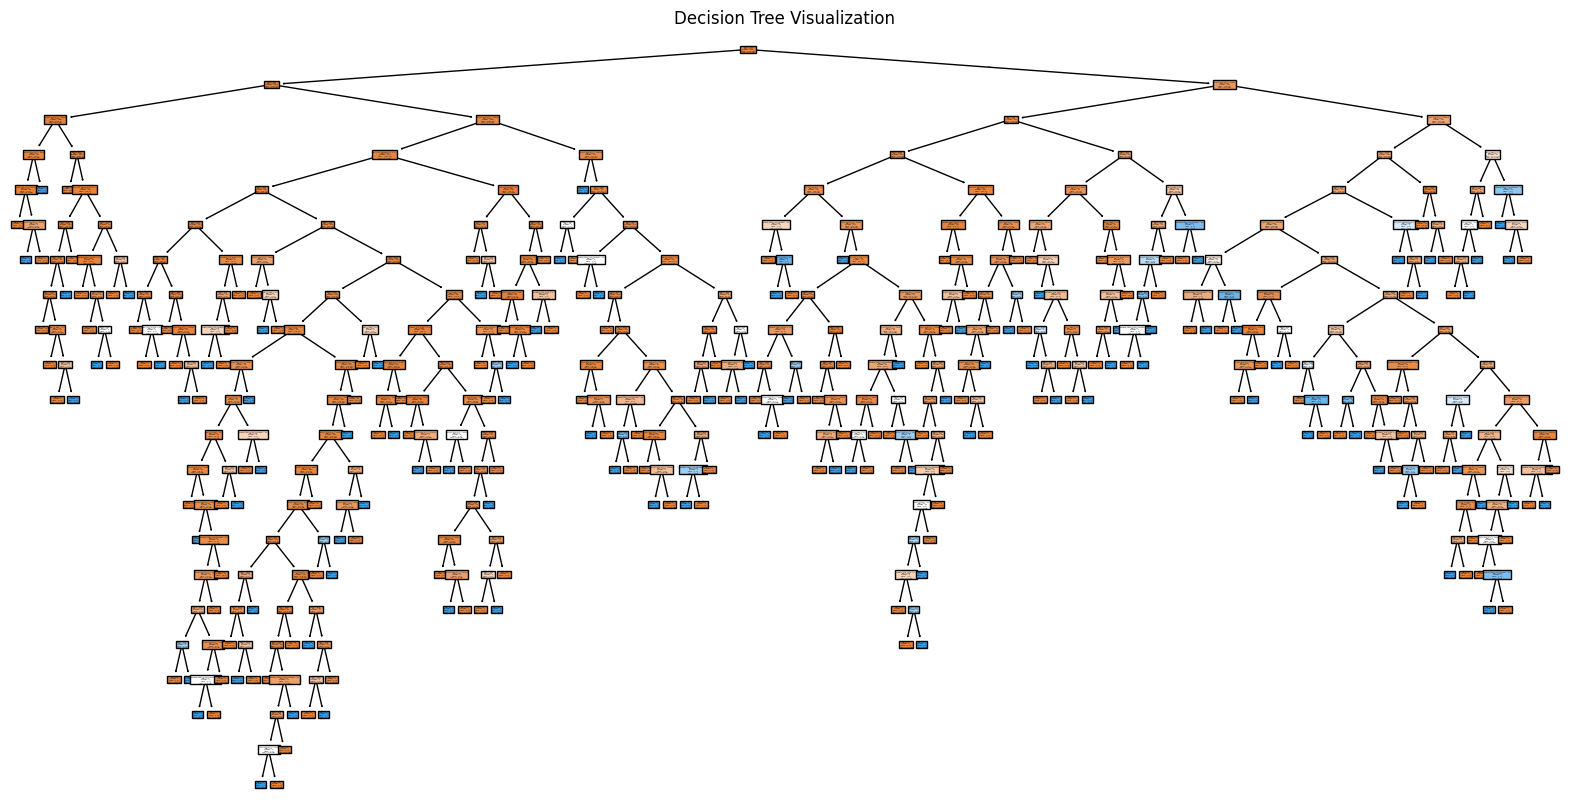

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
y_all = all_data['stroke']

# check class distribution for stroke
print("Class distribution:\n", y_all.value_counts())

# train the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# predict on the training and validation sets
y_train_pred = dtree.predict(X_train)
y_val_pred = dtree.predict(X_val)

# evaluate the model
print("\nTraining Set Metrics:")
print(classification_report(y_train, y_train_pred))
print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))

# decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X_train.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Using a decision tree classifier

In [86]:
# make more balanced
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)


Pruned Decision Tree - Training Set Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3771
           1       0.71      0.06      0.12       156

    accuracy                           0.96      3927
   macro avg       0.84      0.53      0.55      3927
weighted avg       0.95      0.96      0.95      3927


Pruned Decision Tree - Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       468
           1       0.00      0.00      0.00        23

    accuracy                           0.95       491
   macro avg       0.48      0.50      0.49       491
weighted avg       0.91      0.95      0.93       491



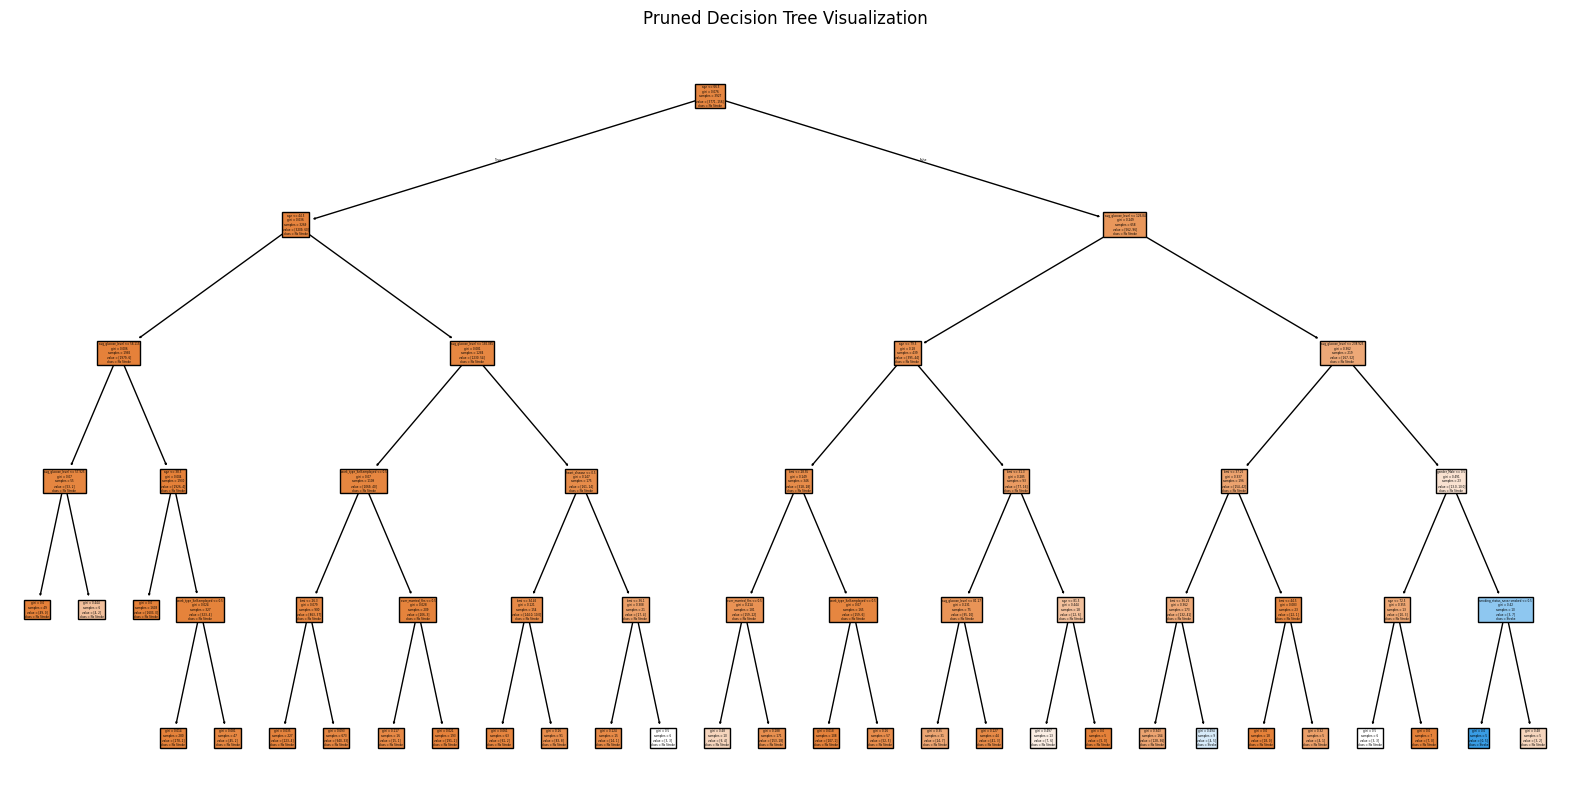

In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# define the decision tree classifier with constraints
dtree_pruned = DecisionTreeClassifier(
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5,
    random_state=42
)

# train the pruned decision tree classifier
dtree_pruned.fit(X_train, y_train)

# predict on the training and validation sets
y_train_pred_pruned = dtree_pruned.predict(X_train)
y_val_pred_pruned = dtree_pruned.predict(X_val)

# evaluate the model
print("\nPruned Decision Tree - Training Set Metrics:")
print(classification_report(y_train, y_train_pred_pruned))
print("\nPruned Decision Tree - Validation Set Metrics:")
print(classification_report(y_val, y_val_pred_pruned))

# decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(dtree_pruned, feature_names=X_train.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()

### Hypertension bar graph

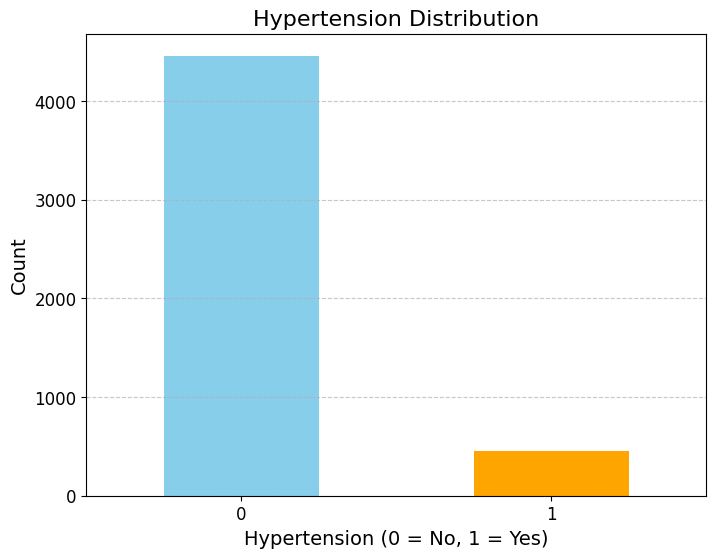

In [88]:
import matplotlib.pyplot as plt

# distribution of hypertension
hypertension_distribution = all_data['hypertension'].value_counts()

# plotting the bar graph
plt.figure(figsize=(8, 6))
hypertension_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Hypertension Distribution', fontsize=16)
plt.xlabel('Hypertension (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# G. KNN Model

In [89]:
# importing the data
import pandas as pd
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# import statements for KNN section
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [90]:
# splitting the data by variable
X = stroke_data.drop('stroke', axis = 1)
y = stroke_data['stroke']

### pre-processing the data

In [91]:
# checking for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns

# one-hot encoding the categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)

# Normalizing numeric features for KNN
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [92]:
# splitting into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting testing into testing and validation
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42) 

## KNN with k-value 5

In [93]:
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier(5)

# fit/train the model on the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
# making predictions on the data
y_train_predicted = model.predict(X_train)
y_val_predicted = model.predict(X_val)

print('Training Set')
print(metrics.classification_report(y_train, y_train_predicted))

print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted))

Training Set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3901
           1       0.79      0.06      0.11       187

    accuracy                           0.96      4088
   macro avg       0.87      0.53      0.54      4088
weighted avg       0.95      0.96      0.94      4088

Validation Set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1945
           1       0.71      0.05      0.09        99

    accuracy                           0.95      2044
   macro avg       0.83      0.52      0.54      2044
weighted avg       0.94      0.95      0.93      2044



## KNN with k-value 3

In [95]:
# fit a k-nearest neighbor model to the data
model_2 = KNeighborsClassifier(3)

# fit/train the model on the training data
model_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
# making predictions on the data
y_train_predicted = model_2.predict(X_train)
y_val_predicted = model_2.predict(X_val)

print('Training Set')
print(metrics.classification_report(y_train, y_train_predicted))

print('Validation Set')
print(metrics.classification_report(y_val, y_val_predicted))

Training Set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3901
           1       0.83      0.19      0.31       187

    accuracy                           0.96      4088
   macro avg       0.90      0.59      0.64      4088
weighted avg       0.96      0.96      0.95      4088

Validation Set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1945
           1       0.86      0.18      0.30        99

    accuracy                           0.96      2044
   macro avg       0.91      0.59      0.64      2044
weighted avg       0.95      0.96      0.95      2044



## KNN with oversampling by SMOTE

In [97]:
# to fix the imbalanced data, I'll try oversampling the data before running another kNN model:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class (stroke class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [98]:
# initialize a k-nearest neighbor model with k = 3
model_smote = KNeighborsClassifier(3)

# fit/train the model on the oversampled "SMOTE" data
model_smote.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [99]:
# making predictions on the data
y_train_predicted = model_smote.predict(X_train_resampled)
y_test_predicted = model_smote.predict(X_test)

# Print classification reports
print('Training Set')
print(metrics.classification_report(y_train_resampled, y_train_predicted))

print('Test Set')
print(metrics.classification_report(y_test, y_test_predicted))

Training Set
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3901
           1       0.94      1.00      0.97      3901

    accuracy                           0.97      7802
   macro avg       0.97      0.97      0.97      7802
weighted avg       0.97      0.97      0.97      7802

Test Set
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1956
           1       0.43      1.00      0.60        88

    accuracy                           0.94      2044
   macro avg       0.71      0.97      0.78      2044
weighted avg       0.98      0.94      0.95      2044

